In [2]:
# import libraries
import pandas as pd

# load dataset
#df = pd.read_csv("hotel_bookings(1).csv")
df = pd.read_csv("hotel_bookings.csv")

# Data Cleaning - Remove rows with missing values in relevant columns
df_clean = df.dropna(subset=["country", "adr", "is_canceled"])

# group by country and calculate:
# - average daily rate (adr)
# - cancellation rate (mean of is_canceled gives the % of bookings cancelled)
# - number of bookings (to filter out countries with too few bookings)
country_stats = df_clean.groupby("country").agg(
    mean_adr=("adr", "mean"),
    cancellation_rate=("is_canceled", "mean"),
    booking_count=("is_canceled", "count")
).reset_index()

# filter out countries with too few bookings (e.g. <50) for more reliable insights
country_stats_filtered = country_stats[country_stats["booking_count"] >= 50]

# sort by mean ADR in descending order to find top 10 highest revenue markets
top_countries = country_stats_filtered.sort_values(by="mean_adr", ascending=False).head(10)

# display top countries
print(top_countries)

    country    mean_adr  cancellation_rate  booking_count
5       ARE  135.564902           0.843137             51
103     MAR  134.395521           0.420849            259
100     LUX  132.393380           0.379791            287
77      IRN  127.988675           0.277108             83
163     TWN  126.376275           0.274510             51
169     USA  122.950262           0.239027           2096
29      CHE  121.830133           0.247399           1730
124     NOR  121.633015           0.298188            607
85      JPN  121.240355           0.142132            197
35      COL  121.198028           0.323944             71


<Figure size 1200x600 with 0 Axes>

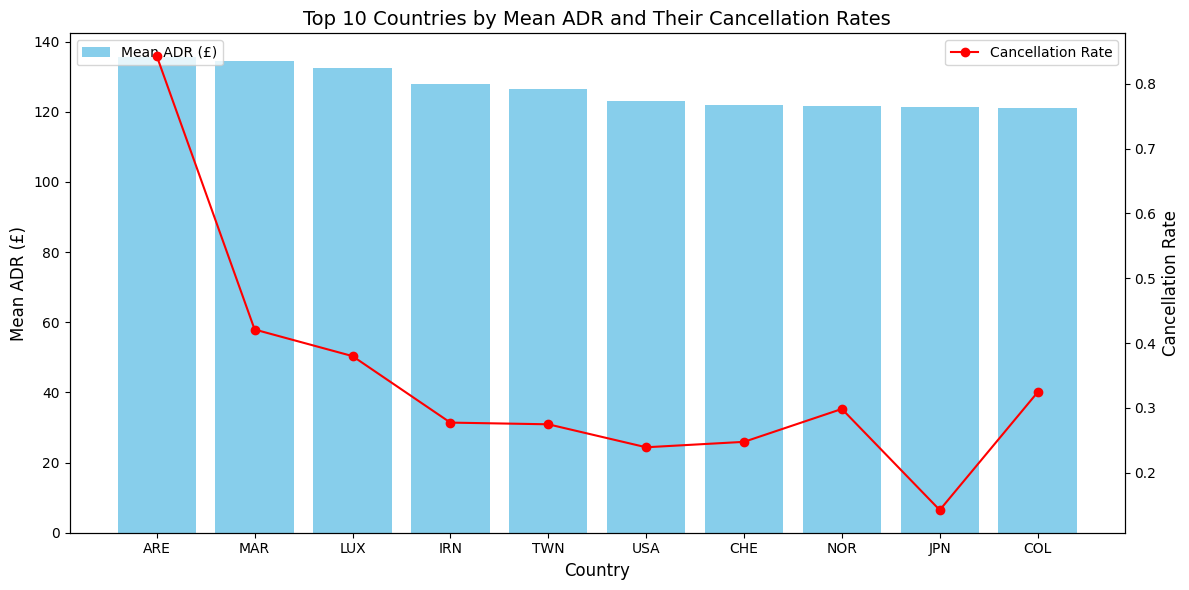

In [3]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(12, 6))

# Create a bar chart for mean ADR
fig, ax1 = plt.subplots(figsize=(12, 6))

countries = top_countries["country"]
mean_adr = top_countries["mean_adr"]
cancellation_rate = top_countries["cancellation_rate"]

# Plot ADR on the primary y-axis
ax1.bar(countries, mean_adr, color='skyblue', label='Mean ADR (£)')
ax1.set_ylabel("Mean ADR (£)", fontsize=12)
ax1.set_xlabel("Country", fontsize=12)
ax1.set_title("Top 10 Countries by Mean ADR and Their Cancellation Rates", fontsize=14)

# Create secondary y-axis for cancellation rate
ax2 = ax1.twinx()
ax2.plot(countries, cancellation_rate, color='red', marker='o', label='Cancellation Rate')
ax2.set_ylabel("Cancellation Rate", fontsize=12)

# Add legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Improve x-axis label readability
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Business Question
Which countries generate the highest revenue per booking (ADR), and how does that compare with their cancellation rates?

### Relevance
Understanding which markets are both profitable and reliable is essential for hotel managers seeking to prioritise marketing efforts, optimise pricing, and reduce revenue uncertainty. High-paying customers may seem attractive, but if they cancel frequently, the business impact can be negative. This analysis helps identify valuable markets that offer both high revenue and booking stability.

### Data Justification
The analysis uses three key attributes: `country`, `adr` (average daily rate), and `is_canceled`. The `adr` reflects the revenue generated per booking, while `is_canceled` indicates booking reliability. Grouping by `country` and calculating the mean ADR and cancellation rate allows for a straightforward comparison across national markets. To ensure meaningful insights, countries with fewer than 50 bookings were excluded to avoid skewed results from small samples.

### Findings and Insights
The analysis reveals that while some countries like the UAE and Morocco have high average booking values, they also show significantly higher cancellation rates. In contrast, countries such as Japan and the USA combine high ADR with lower cancellation rates, making them more reliable markets. This suggests that focusing on consistent, high-yield countries may lead to more sustainable revenue.


Overall mark: 64

#### Business Question:
The business question is clearly defined and is related to the dataset. The importance of the question to the hotel industry is also explained. The findings and implications are well supported by the data analysis using the selected variables.

<u>Very good</u>

#### Data:
Relevant variables including country, adr and is_canceled are effectively identified in order to answer the proposed question. The rationale of choosing these variables is addressed. Appropriate data filtering and data grouping are applied during the data analysis, which shows good data manipulation skill. However, the question is straightforward to answer, which limit the potential to further explor other useful variables.

<u>Good</u>

#### Visualization:
A dotted line is plotted together with a bar chart, which informatively supports the findings and implications. The plot comes with essential elements such as the title, axis labels and ticks. Necessary legends are also provided. The combination of a dotted line with a bar chart provides good comparison of two metrics. Improvements could include using more plots (probably based on more variables) and making them as subplots in an overall plot.

<u>Good</u>

#### Code:
The code structure is clear and easy to follow. There is no major errors, except a minor issue in importing the data file (you should use exactly the same file name as provided, instead of "hotel_bookings(1).csv"). Comments are provided where necessary.

<u>Very good</u>